
# 编程作业三  
课本P26

站点信息  
sta. XM       
Lat:24deg. 27min. N 
Lon:118deg. 40min. E  
units: mm
time: 1996-12-27~1997-12-31 (GMT)
missvaule: 9999

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
# import grubbs

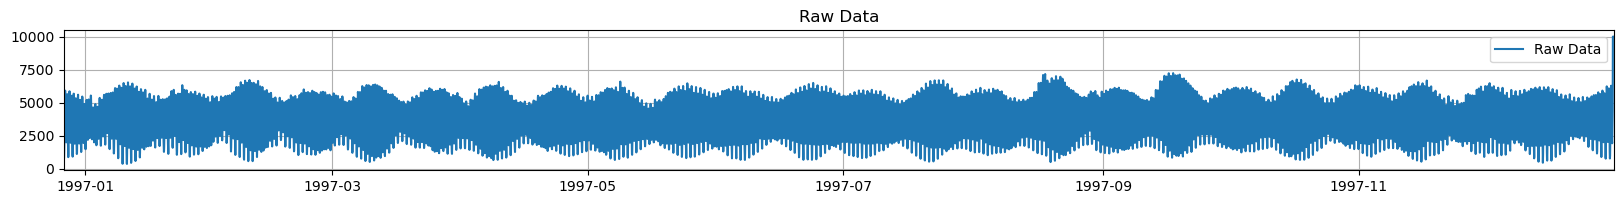

In [2]:
# 数据读取
datas=[]
dates=[]
for i in open('xm-370d.txt').readlines()[6:]:
    sp=i.split()
    #print(sp)
    for i in range(24):
        dates.append(f'{sp[0][:4]}{sp[0][4:6]}{sp[0][6:8]} {i:0>2}:00')
    datas.extend(sp[1:])
datas=np.array(list(map(int,datas)))
dates=pd.to_datetime(np.unique(dates))
# 可视化
plt.figure(figsize=[20,4])
plt.subplot(2,1,1)
plt.plot(dates,datas,label='Raw Data')
plt.title('Raw Data')
plt.xlim(dates[0],dates[-1]);plt.legend();plt.grid();plt.show()

In [17]:
datas[-8:]

array([9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999])

In [19]:
d=pd.DataFrame(index=dates[:-8],data=datas[:-8],columns=['values'])

In [6]:
import hatyan

In [21]:
const_list=hatyan.get_const_list_hatyan('year')

running: get_components_from_ts
analysis_perperiod=Y, separate periods are automatically determined from timeseries
analyzing 1996 of sequence ['1996', '1997']
ANALYSIS initializing
source               = schureman
nodalfactors         = True
fu_alltimes          = True
xfac                 = False
CS_comps             = None
analysis_perperiod   = Y
return_allperiods    = True
return_prediction    = False
xTxmat_condition_max = 12

#timesteps           = 120
tstart               = 1996-12-27 00:00:00
tstop                = 1996-12-31 23:00:00
timestep             = None
components analyzed  = 95
percentage_nan in values_meas_sel: 0.00%
freq is calculated at mid of period: 1996-12-29 12:00:00
v0 is calculated for start of period: 1996-12-27 00:00:00
nodal factors (f and u) are calculated for all timesteps
folding frequencies over Nyquist frequency, which is half of the dominant timestep (1.0 hour), there are 1 unique timesteps)
Rayleigh criterion vandalised (not always>0.70, minimum is

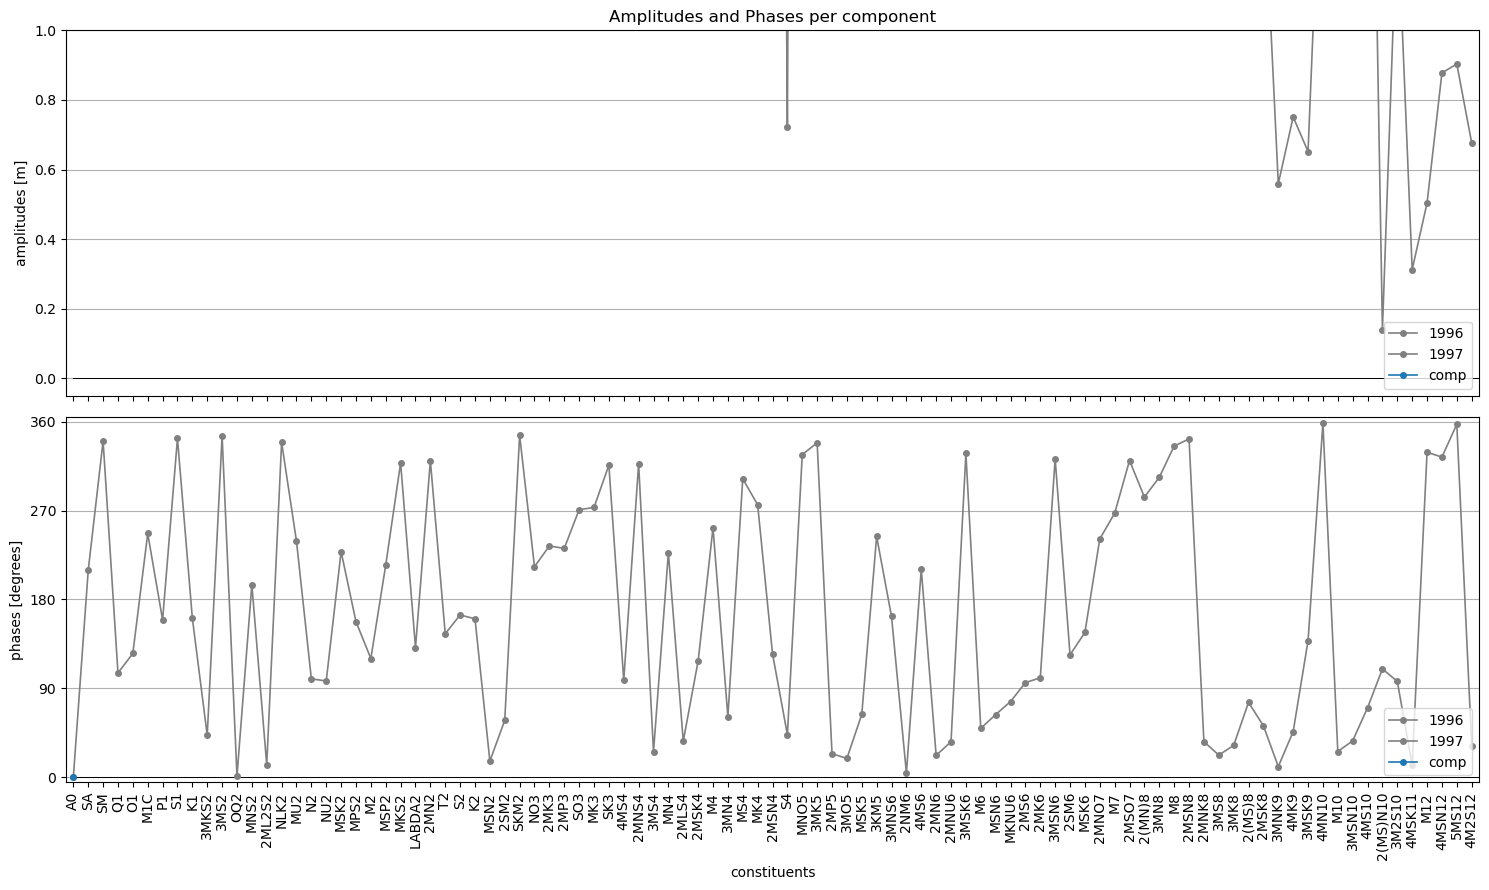

In [22]:
comp_frommeas, comp_allyears = hatyan.get_components_from_ts(ts=d, const_list=const_list, nodalfactors=True, return_allperiods=True, fu_alltimes=True, analysis_perperiod='Y')
fig,(ax1,ax2) = hatyan.plot_components(comp=comp_frommeas, comp_allyears=comp_allyears)

In [24]:
ts_prediction = hatyan.prediction(comp=comp_frommeas, nodalfactors=True, fu_alltimes=True, times_ext=times_ext, timestep_min=timestep_min)
fig, (ax1,ax2) = hatyan.plot_timeseries(ts=ts_prediction, ts_validation=d)
ax1.legend(['prediction','measurement','difference','mean of prediction'])

NameError: name 'times_ext' is not defined

In [ ]:

plt.figure(dpi=300)
ax=plt.axes(facecolor='white', projection=ccrs.PlateCarree(central_longitude=0))
ax.set_title('Site Map')
ax.set_xlim(105,125)
ax.set_ylim(18,30)
ax.scatter(118+40/60,24+27/60,c='Orange',marker='*',s=80,label='site')
ax.legend()
ax.set_xticks(np.arange(105,126,5))
ax.set_yticks(np.arange(18,31,2))
ax.xaxis.set_major_formatter(LongitudeFormatter())#刻度格式转换为经纬度样式 
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_minor_locator(mticker.MultipleLocator(5))#刻度格式转换为经纬度样式 
ax.yaxis.set_minor_locator(mticker.MultipleLocator(5))
ax.coastlines()
plt.show()

In [ ]:
import os
os.chdir('..') #necessary to go one level up to the root directory to find hatyan in notebook/binder
import datetime as dt
import pandas as pd
import xarray as xr
import hatyan
hatyan.close('all')

In [ ]:
const_list = hatyan.get_const_list_hatyan('year')

In [ ]:
file_data_meas = 'http://uhslc.soest.hawaii.edu:80/opendap/rqds/global/hourly/h825a.nc' #Cuxhaven dataset from UHSLC database
times_ext = [dt.datetime(2017,1,1),dt.datetime(2018,12,31)]
timestep_min = 10
ts_data = xr.open_dataset(file_data_meas)
ts_data_sel = ts_data.sea_level.isel(record_id=0).sel(time=slice(times_ext[0],times_ext[1]))
ts_data_sel = (ts_data_sel/1000-5).assign_attrs({'units':'meters'}) #correct from mm to meters and for 5m offset
ts_meas = pd.DataFrame({'values':ts_data_sel.to_series()})

In [ ]:
comp_frommeas, comp_allyears = hatyan.get_components_from_ts(ts=ts_meas, const_list=const_list, nodalfactors=True, return_allperiods=True, fu_alltimes=True, analysis_perperiod='Y')
fig,(ax1,ax2) = hatyan.plot_components(comp=comp_frommeas, comp_allyears=comp_allyears)